<a href="https://colab.research.google.com/github/Clever-Lazinezz/ML-Data2/blob/main/Copy_of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [4]:
df1.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [5]:
#ooo that's a lot of data
df1.shape

(2502832, 6)

In [6]:
df1.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
df1['county']

0           Snohomish
1           Snohomish
2           Snohomish
3                Cook
4           Snohomish
              ...    
2502827    Sweetwater
2502828         Teton
2502829         Uinta
2502830      Washakie
2502831        Weston
Name: county, Length: 2502832, dtype: object

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [8]:
#long title to make data in set clear
nassau_countydf = df1[df1['county']=='Nassau']

In [9]:
nassau_countydf.head()

,date,county,state,fips,cases,deaths
564,2020-03-05,Nassau,New York,36059.0,1,0.0
626,2020-03-06,Nassau,New York,36059.0,4,0.0
714,2020-03-07,Nassau,New York,36059.0,4,0.0
819,2020-03-08,Nassau,New York,36059.0,5,0.0
946,2020-03-09,Nassau,New York,36059.0,17,0.0


In [10]:
nassau_countydf.shape

(1595, 6)

In [11]:
#a blunder: multiple counties with the same name
nassau_countydf.tail()

,date,county,state,fips,cases,deaths
2494938,2022-05-11,Nassau,New York,36059.0,424236,3851.0
2496683,2022-05-12,Nassau,Florida,12089.0,21949,294.0
2498196,2022-05-12,Nassau,New York,36059.0,425386,3852.0
2499941,2022-05-13,Nassau,Florida,12089.0,21949,294.0
2501454,2022-05-13,Nassau,New York,36059.0,425386,3853.0


In [12]:
#The fix is to create a subest of just new york data, and then a subset of just nassau county, new york data

In [13]:
temp = df1[df1['state']=='New York']

In [14]:
nassau_countydf = temp[temp['county']=='Nassau']

In [15]:
nassau_countydf.head()

,date,county,state,fips,cases,deaths
564,2020-03-05,Nassau,New York,36059.0,1,0.0
626,2020-03-06,Nassau,New York,36059.0,4,0.0
714,2020-03-07,Nassau,New York,36059.0,4,0.0
819,2020-03-08,Nassau,New York,36059.0,5,0.0
946,2020-03-09,Nassau,New York,36059.0,17,0.0


In [16]:
#Roughly the expected size(half of the 1595)
nassau_countydf.shape

(800, 6)

In [17]:
nassau_countydf.tail()

,date,county,state,fips,cases,deaths
2488422,2022-05-09,Nassau,New York,36059.0,422614,3847.0
2491680,2022-05-10,Nassau,New York,36059.0,423242,3850.0
2494938,2022-05-11,Nassau,New York,36059.0,424236,3851.0
2498196,2022-05-12,Nassau,New York,36059.0,425386,3852.0
2501454,2022-05-13,Nassau,New York,36059.0,425386,3853.0


In [18]:
#total reported deaths due to covid in nassau county to date 07/19/22
#death count is already cumalitive
nassau_countydf['deaths'].max()

3853.0

Finding new covid 19 cases on daily basis (new cases added everyday)

In [19]:
#new cases for Nassau County, New York

newcase = []
previuos_case = 0
for index, row in nassau_countydf.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [20]:
nassau_countydf['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
nassau_countydf.head()

,date,county,state,fips,cases,deaths,new_cases
564,2020-03-05,Nassau,New York,36059.0,1,0.0,1
626,2020-03-06,Nassau,New York,36059.0,4,0.0,3
714,2020-03-07,Nassau,New York,36059.0,4,0.0,0
819,2020-03-08,Nassau,New York,36059.0,5,0.0,1
946,2020-03-09,Nassau,New York,36059.0,17,0.0,12


In [22]:
nassau_countydf['new_cases'].sum()

425386

In [23]:
nassau_cases = nassau_countydf['cases']
nassau_deaths = nassau_countydf['deaths']
nassau_dates = nassau_countydf['date']
nassau_new_cases = nassau_countydf['new_cases']


In [24]:
type(nassau_new_cases)

pandas.core.series.Series

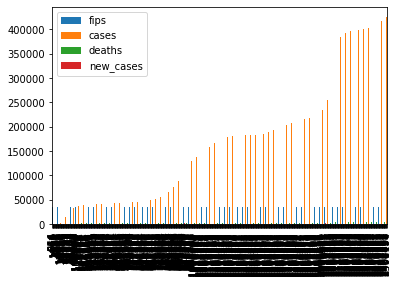

In [25]:
nassau_countydf.plot(kind='bar')

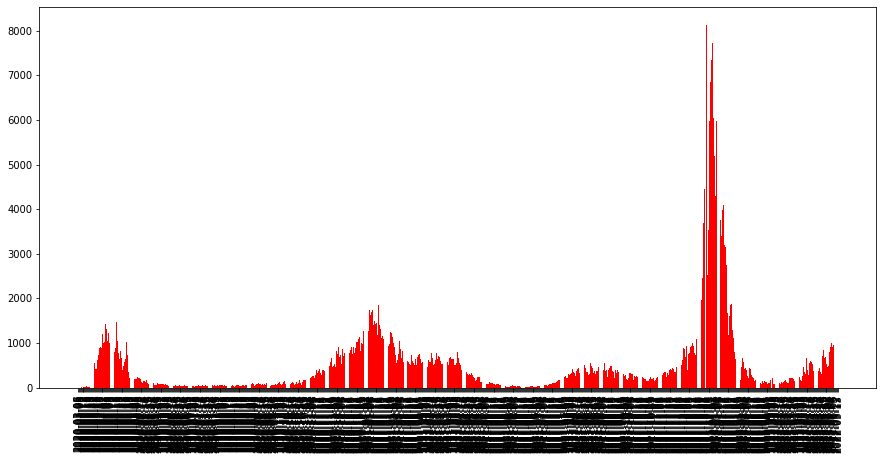

In [26]:
plt.figure(figsize=(15,7))
plt.bar(x=nassau_dates, height=nassau_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [28]:
#data is stored from oldest dat to newest; therefor, recent data is located at the end of the data structure
nassau_cases_30 = nassau_countydf['cases'][-31:-1]
nassau_deaths_30 = nassau_countydf['deaths'] [-31:-1]
nassau_dates_30 = nassau_countydf['date'][-31:-1]
nassau_new_cases_30 = nassau_countydf['new_cases'][-31:-1]

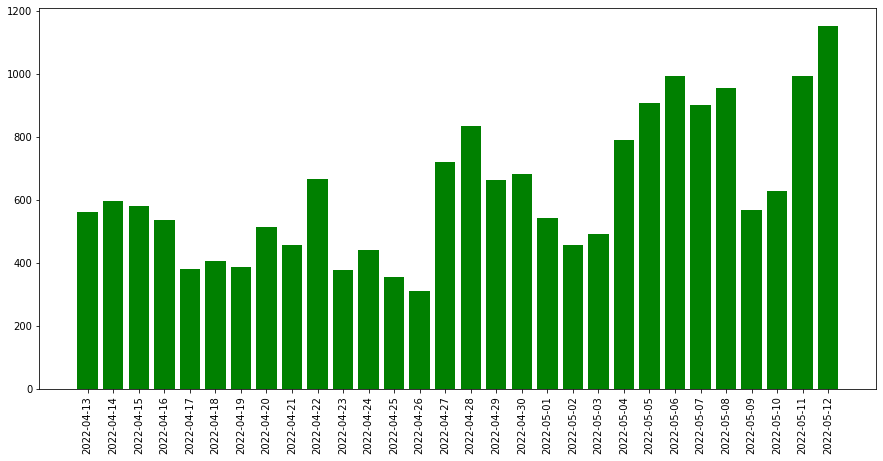

In [29]:
plt.figure(figsize=(15,7))
plt.bar(x=nassau_dates_30, height=nassau_new_cases_30, color='green')
plt.xticks(rotation=90)
plt.show()

In [31]:
nassau_countydf.tail()

,date,county,state,fips,cases,deaths,new_cases
2488422,2022-05-09,Nassau,New York,36059.0,422614,3847.0,567
2491680,2022-05-10,Nassau,New York,36059.0,423242,3850.0,628
2494938,2022-05-11,Nassau,New York,36059.0,424236,3851.0,994
2498196,2022-05-12,Nassau,New York,36059.0,425386,3852.0,1150
2501454,2022-05-13,Nassau,New York,36059.0,425386,3853.0,0


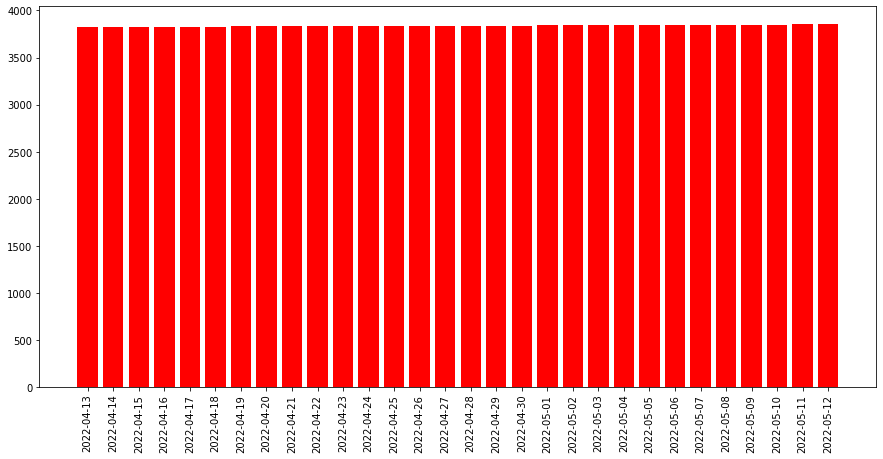

In [33]:
plt.figure(figsize=(15,7))
plt.bar(x=nassau_dates_30, height=nassau_deaths_30, color='red')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [38]:
states = ['New York', 'California','Florida', 'New Jersey','Virginia']

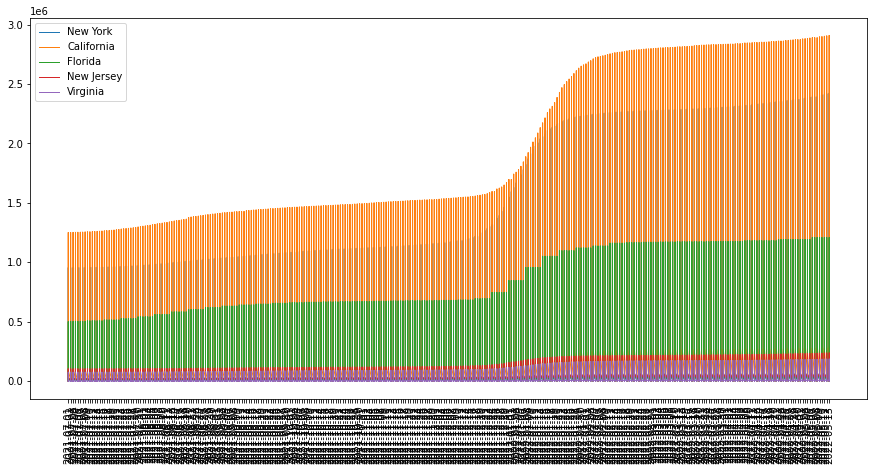

In [41]:
plt.figure(figsize=(15,7))
for state in states:
  df1_st = df1[(df1['state']==state) & (df1['date']>='2021-07-01')]
  plt.plot(df1_st['date'],
           df1_st['cases'],
           linewidth=1.0
           )
  plt.xticks(rotation=90)
#Nice to know you can add legends
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Deaths from Covid-19 have become stagnent, increasing by roughly one-two deaths per day, in the past 30 days
2.   Conclusion 2
     --The rate of new Covid-19 infections is slowly rising in the past 30 days. Given the current data, the 30 day count should be continually monitored to as winter approaches.

